<a href="https://colab.research.google.com/github/harsh-bat/tensorFlow2Learn/blob/master/CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_test.shape

(10000, 1)

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
y_test.shape

(10000,)

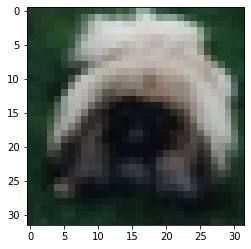

In [7]:
plt.imshow(X_train[5201])

In [8]:
K = len(np.unique(y_train))

In [9]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [30]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6082 - accuracy: 0.4109 - val_loss: 1.3182 - val_accuracy: 0.5213
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3046 - accuracy: 0.5300 - val_loss: 1.1784 - val_accuracy: 0.5767
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1685 - accuracy: 0.5827 - val_loss: 1.0670 - val_accuracy: 0.6183
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0913 - accuracy: 0.6095 - val_loss: 0.9889 - val_accuracy: 0.6539
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0329 - accuracy: 0.6320 - val_loss: 0.9469 - val_accuracy: 0.6642
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9903 - accuracy: 0.6463 - val_loss: 0.9240 - val_accuracy: 0.6793
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9555 - accuracy: 0.6607 - val_loss: 0.9458 - val_accuracy:

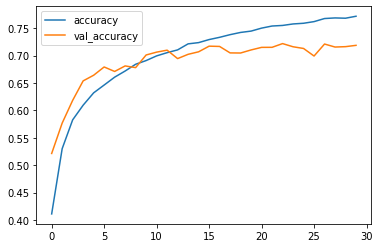

In [32]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

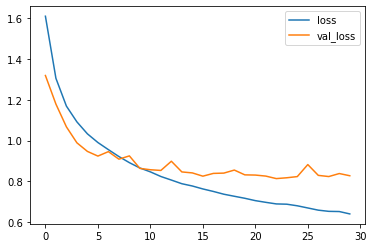

In [33]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Confusion matrix, without normalization
[[745  16  40  33  30   1   7  17  65  46]
 [  7 844   0   7   4   7   9   4  23  95]
 [ 59   5 489  99 155  66  62  35  13  17]
 [ 20  11  44 540  96 155  63  45  12  14]
 [ 16   3  23  61 750  24  32  75   9   7]
 [  4   5  22 197  68 603  24  61   7   9]
 [  5   4  22  88  55  27 778   7   6   8]
 [ 11   2  10  41  76  43   7 793   3  14]
 [ 45  37   9  22   9   5   5   7 824  37]
 [ 26  76   3  13   5   9   7  21  18 822]]


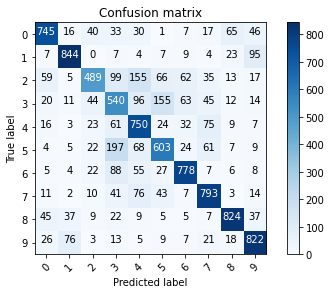

In [34]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


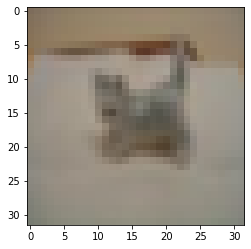

In [38]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')